In [2]:
import torch

data = torch.load('/work3/s201390/VideoGeneration/data/apple/flows/right.pth')
print(type(data), data.shape)


<class 'torch.Tensor'> torch.Size([1, 2, 512, 512])


EXISTING FLOW

<class 'torch.Tensor'> torch.Size([1, 2, 512, 512])
<class 'numpy.ndarray'> (2, 512, 512)


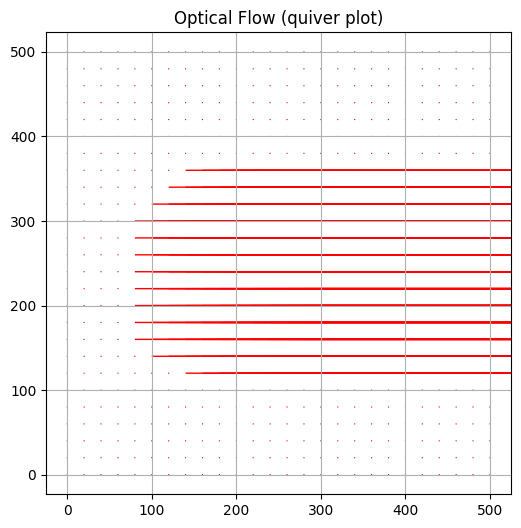

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load and squeeze batch dim
flow = torch.load('/work3/s201390/VideoGeneration/data/apple/flows/right.pth')
print(type(flow), flow.shape)
flow = flow.squeeze(0).numpy()  # shape: (2, 512, 512)
print(type(flow), flow.shape)
# Extract dx and dy
u = flow[0]  # horizontal flow
v = flow[1]  # vertical flow

# Subsample for cleaner visualization
step = 20
H, W = u.shape
y, x = np.mgrid[0:H:step, 0:W:step]

# Plot quiver
plt.figure(figsize=(6, 6))
plt.quiver(x, y, u[::step, ::step], -v[::step, ::step], color='r', scale=100, width=0.003)
plt.title("Optical Flow (quiver plot)")
plt.axis("equal")
plt.grid(True)
plt.show()


COSTUM FLOW

<class 'torch.Tensor'> torch.Size([1, 2, 512, 512])
<class 'torch.Tensor'> torch.Size([1, 2, 512, 512])
<class 'numpy.ndarray'> (2, 512, 512)


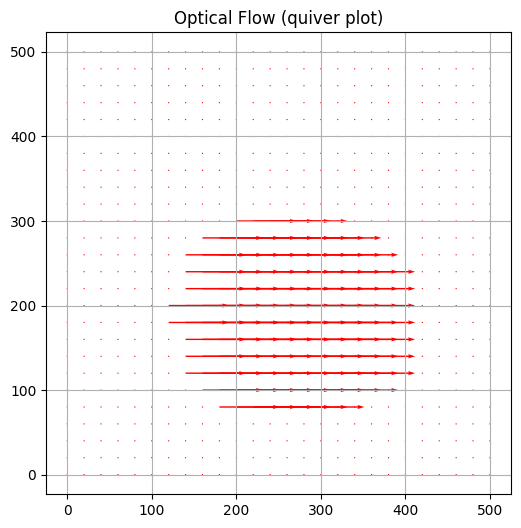

In [39]:
import numpy as np
import torch

flow = torch.load('/work3/s201390/VideoGeneration/assets/custom_flows_apple_test/flow_0.pth')
print(type(flow), flow.shape)


import torch
import matplotlib.pyplot as plt
import numpy as np

# Load and squeeze batch dim
print(type(flow), flow.shape)
flow = flow.squeeze(0).numpy()  # shape: (2, 512, 512)
print(type(flow), flow.shape)
# Extract dx and dy
u = flow[1]  # horizontal flow
v = flow[0]  # vertical flow

# Subsample for cleaner visualization
step = 20
H, W = u.shape
x, y = np.mgrid[0:H:step, 0:W:step]

# Plot quiver
plt.figure(figsize=(6, 6))
plt.quiver(x, y, u[::step, ::step], -v[::step, ::step], color='r', scale=100, width=0.003)
plt.title("Optical Flow (quiver plot)")
plt.axis("equal")
plt.grid(True)
plt.show()


# Exploring masks

### Existing mask

In [19]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load and squeeze batch dim
mask = torch.load('/work3/s204129/adlicv/project/VideoGeneration/data/topiary/flows/mask.pth')
print(type(mask), mask.shape)

<class 'torch.Tensor'> torch.Size([1, 4, 64, 64])


In [ ]:
data = torch.load('/work3/s204129/adlicv/project/VideoGeneration/data/topiary/flows/mask.pth')
print(data.shape)
print(data.min(), data.max())

torch.Size([1, 4, 64, 64])
tensor(False) tensor(True)


In [20]:
import numpy as np
import torch

mask = torch.load('/work3/s204129/adlicv/project/VideoGeneration/assets/custom_flows/mask.pth')
print(type(mask), mask.shape)



<class 'torch.Tensor'> torch.Size([512, 512])


In [ ]:
mask.shape

torch.Size([1, 4, 64, 64])

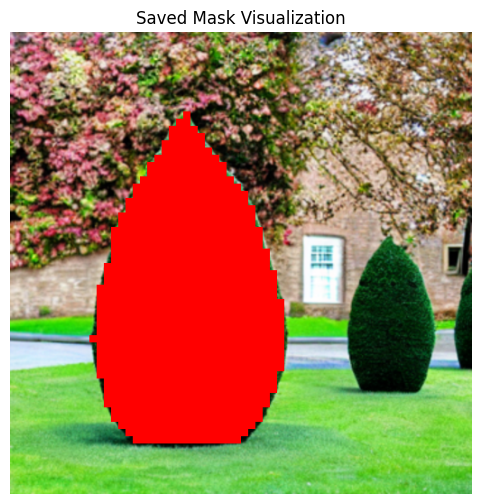

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# --- Load masks ---
mask = torch.load('/work3/s204129/adlicv/project/VideoGeneration/assets/custom_flows/mask.pth')  # (1, 4, 64, 64)
mask = mask.numpy()[0][0]  # (4, 64, 64)

# --- Load background image ---
background = np.array(Image.open('/work3/s204129/adlicv/project/VideoGeneration/assets/topiary.png').resize((512, 512)).convert('RGB'))


# --- Visualize the saved mask for confirmation ---
upscaled_mask = np.array(Image.fromarray(mask * 255).resize((512, 512), Image.NEAREST))
vis_overlay = background.copy()
vis_overlay[upscaled_mask == 255] = [255, 0, 0]

plt.figure(figsize=(6, 6))
plt.imshow(vis_overlay)
plt.title("Saved Mask Visualization")
plt.axis('off')
plt.show()


# What is that start.zt

In [51]:
start = torch.load('/work3/s204129/adlicv/project/VideoGeneration/data/topiary/start_zt.pth')
print(type(start), start.shape)

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.